In [1]:
import torch
import numpy as np
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from pytorch_bpnn import BPNNModel

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: <function data_tf at 0x000001CEA0C00EE0>
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: <function data_tf at 0x000001CEA0C00EE0>
torch.Size([784])
5
torch.Size([64, 784])
torch.Size([64])


In [2]:
# 创建和实例化一个整个模型类的对象
model = BPNNModel()
# 定义 loss 函数，这里用的是交叉熵损失函数(Cross Entropy)，这种损失函数之前博文也讲过的。
criterion = nn.CrossEntropyLoss()
# 我们优先使用随机梯度下降，lr是学习率: 0.2
optimizer = torch.optim.SGD(model.parameters(), 2e-1)

In [3]:
# 用数组保存每一轮迭代中，训练的损失值和精确度，也是为了通过画图展示出来。
train_losses = []
train_acces = []
# 用数组保存每一轮迭代中，在测试数据上测试的损失值和精确度，也是为了通过画图展示出来。
eval_losses = []
eval_acces = []

In [4]:
data_labeld = np.loadtxt("norm_eigen_z_labeled.csv", delimiter=",", dtype=np.float32)

In [5]:
data = data_labeld[:1, :7]
label = data_labeld[:1, 8:].astype(np.int64)

---
### Start train

In [52]:
train_loss = 0
train_acc = 0
model.train()   # 将模型改为训练模式

BPNNModel(
  (layer1): Sequential(
    (0): Linear(in_features=7, out_features=12, bias=True)
    (1): ReLU()
  )
  (layer2): Sequential(
    (0): Linear(in_features=12, out_features=10, bias=True)
    (1): ReLU()
  )
  (layer3): Sequential(
    (0): Linear(in_features=10, out_features=8, bias=True)
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Linear(in_features=8, out_features=2, bias=True)
  )
)

In [8]:
data = torch.from_numpy(data)
label = torch.from_numpy(label)

In [9]:
data = Variable(data)
label = Variable(label)

In [10]:
label = torch.flatten(label)

In [11]:
out = model(data)
# loss = criterion(out, label)

In [12]:
loss = criterion(out, label)

In [43]:
# 反向传播，记得要把上一次的梯度清0，反向传播，并且step更新相应的参数。
optimizer.zero_grad()
loss.backward()
optimizer.step()

# 记录误差
train_loss += loss.item()

# 计算分类的准确率
_, pred = out.max(1)
pred

tensor([1])

In [6]:
for e in range(10000):
    train_loss = 0
    train_acc = 0
    model.train()   # 将模型改为训练模式
    train_data = data_labeld[:34, :7]
    train_label = data_labeld[:34, 8:].astype(np.int64)
    for i in range(34):
        train_data_s = torch.from_numpy(train_data[i]).reshape(1, 7)
        train_label_s = torch.from_numpy(train_label[i])
        train_label_s = torch.flatten(train_label_s)
        train_data_s = Variable(train_data_s)
        train_label_s = Variable(train_label_s)
        out = model(train_data_s)
        loss = criterion(out, train_label_s)
        # 反向传播，记得要把上一次的梯度清0，反向传播，并且step更新相应的参数。
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # 记录误差
        train_loss += loss.item()
        # 计算分类的准确率
        _, pred = out.max(1)
        num_correct = (pred == train_label_s).sum().item()
        train_acc += num_correct
    train_losses.append(train_loss / 34)
    train_acces.append(train_acc / 34)

    eval_loss = 0
    eval_acc = 0
    model.eval()  # 将模型改为预测模式
    test_data = data_labeld[34:, :7]
    test_lable = data_labeld[34:, 8:].astype(np.int64)
    for j in range(16):
        test_data_s = torch.from_numpy(test_data[j]).reshape(1, 7)
        test_label_s = torch.from_numpy(test_lable[j])
        test_label_s = torch.flatten(test_label_s)
        test_data_s = Variable(test_data_s)
        test_label_s = Variable(test_label_s)
        out = model(test_data_s)
        loss = criterion(out, test_label_s)
        eval_loss += loss.item()
        _, pred = out.max(1)
        num_correct = (pred == test_label_s).sum().item()
        eval_acc += num_correct
    eval_losses.append(eval_loss / 16)
    eval_acces.append(eval_acc / 16)
    print("epoch: {}, train_loss: {}, train_acc: {}, eval_loss: {}, eval_acc: {}".format(e, train_loss / 34, train_acc / 34, eval_loss / 16, eval_acc / 16))


epoch: 0, train_loss: 0.7537274465841406, train_acc: 0.058823529411764705, eval_loss: 0.6938041746616364, eval_acc: 0.5
epoch: 1, train_loss: 0.7499173914684969, train_acc: 0.0, eval_loss: 0.6938322149217129, eval_acc: 0.5
epoch: 2, train_loss: 0.7484448762500987, train_acc: 0.0, eval_loss: 0.693616084754467, eval_acc: 0.5
epoch: 3, train_loss: 0.7478689796784345, train_acc: 0.0, eval_loss: 0.6933383569121361, eval_acc: 0.5
epoch: 4, train_loss: 0.7478892610353582, train_acc: 0.0, eval_loss: 0.6927302926778793, eval_acc: 0.5
epoch: 5, train_loss: 0.7480008409303778, train_acc: 0.0, eval_loss: 0.6920592486858368, eval_acc: 0.5
epoch: 6, train_loss: 0.7476619955371407, train_acc: 0.0, eval_loss: 0.6908406652510166, eval_acc: 0.5
epoch: 7, train_loss: 0.7474194624844719, train_acc: 0.058823529411764705, eval_loss: 0.6868081837892532, eval_acc: 0.5
epoch: 8, train_loss: 0.7488925860208624, train_acc: 0.35294117647058826, eval_loss: 0.6889724098145962, eval_acc: 0.4375
epoch: 9, train_loss:

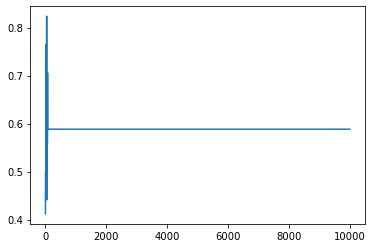

In [39]:
plt.plot(train_acces, label="train_loss")

In [35]:
model.eval()  # 将模型改为预测模式
test_data = data_labeld[34:, :7]
test_lable = data_labeld[34:, 8:].astype(np.int64)
predict_for_sum = []
for j in range(16):
    test_data_s = torch.from_numpy(test_data[j]).reshape(1, 7)
    test_label_s = torch.from_numpy(test_lable[j])
    test_label_s = torch.flatten(test_label_s)
    test_data_s = Variable(test_data_s)
    test_label_s = Variable(test_label_s)
    out = model(test_data_s)
    loss = criterion(out, test_label_s)
    eval_loss += loss.item()
    _, pred = out.max(1)
    predict_for_sum.append(pred.item())
    print(pred.item(), test_label_s.item())

0 0
0 1
0 0
1 1
1 0
0 1
0 0
0 1
0 0
1 1
0 0
1 1
1 0
1 1
0 0
0 1


In [13]:
TP = 6
TN = 4
FP = 2
FN = 4

In [14]:
TP/(TP+FP)

0.75

In [43]:
TP = 0
TN = 0
FP = 0
FN = 0
result = []
for i in range(len(test_lable)):
    if(test_lable[i] == 0 and predict_for_sum[i] == test_lable[i]):
        TP += 1
    if(test_lable[i] == 1 and predict_for_sum[i] == test_lable[i]):
        TN += 1
    if(test_lable[i] == 0 and predict_for_sum[i] != test_lable[i]):
        FP += 1
    if(test_lable[i] == 1 and predict_for_sum[i] != test_lable[i]):
        FN += 1
print(TP, TN, FP, FN)
result.extend(TP/(TP+FP), TP/(TP+FN), TN/(TN+FP), (TP+TN)/(TN+FN+TP+FP))
print(, , )


6 4 2 4
0.75 0.6 0.6666666666666666 0.625


In [42]:
FP

2